# Libs

In [206]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from feature_engine.outliers import OutlierTrimmer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.feature_selection import mutual_info_classif, SelectKBest, f_classif, chi2
from feature_engine.selection import *
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score


In [207]:
df = pd.read_csv("loan_data.csv")
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


# Data Analysis

In [208]:
# Mostrando o shape (dimensões) do DataFrame
print("Dimensões do DataFrame:")
print(df.shape)
print("\n")

# Mostrando as colunas
print("Colunas do DataFrame:")
print(df.columns)
print("\n")

# Mostrando os tipos de dados
print("Tipos de dados de cada coluna:")
print(df.dtypes)
print("\n")

# Mostrando informações gerais do DataFrame
print("Informações gerais do DataFrame:")
df.info()


Dimensões do DataFrame:
(45000, 14)


Colunas do DataFrame:
Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')


Tipos de dados de cada coluna:
person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         

In [209]:
# Convertendo a coluna person_age para int
df['person_age'] = df['person_age'].astype(int)


In [210]:
# Identificando colunas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns

# Exibindo contagens absolutas para cada coluna categórica
print("Análise das colunas categóricas:")
for column in categorical_columns:
    print(f"\n{column}:")
    print(df[column].value_counts())
    print("Número de valores únicos:", df[column].nunique())
    print("---")


Análise das colunas categóricas:

person_gender:
person_gender
male      24841
female    20159
Name: count, dtype: int64
Número de valores únicos: 2
---

person_education:
person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64
Número de valores únicos: 5
---

person_home_ownership:
person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64
Número de valores únicos: 4
---

loan_intent:
loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64
Número de valores únicos: 6
---

previous_loan_defaults_on_file:
previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64
Número de valores únicos: 2
---


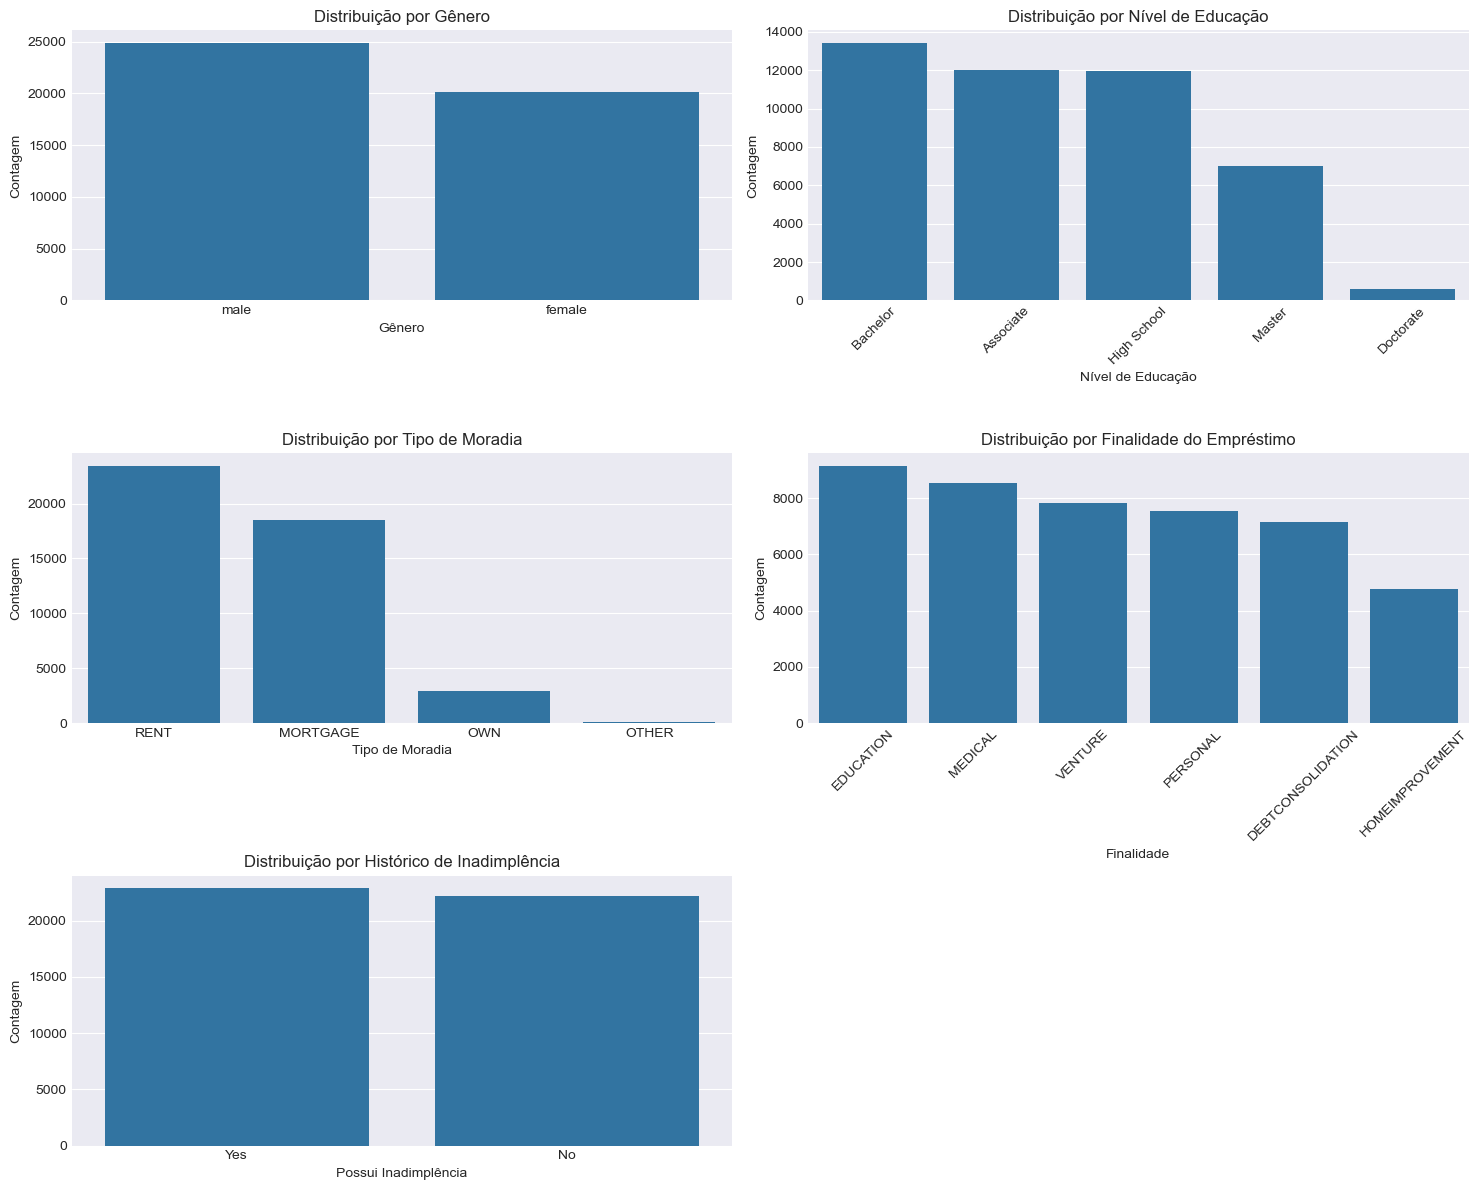

In [211]:
# Configurando o estilo e tamanho dos gráficos
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
# Gráfico para Gênero
sns.barplot(ax=axes[0,0],
           x=df['person_gender'].value_counts().index,
           y=df['person_gender'].value_counts().values)
axes[0,0].set_title('Distribuição por Gênero')
axes[0,0].set_xlabel('Gênero')
axes[0,0].set_ylabel('Contagem')

# Gráfico para Educação
sns.barplot(ax=axes[0,1],
           x=df['person_education'].value_counts().index,
           y=df['person_education'].value_counts().values)
axes[0,1].set_title('Distribuição por Nível de Educação')
axes[0,1].set_xlabel('Nível de Educação')
axes[0,1].set_ylabel('Contagem')
axes[0,1].tick_params(axis='x', rotation=45)

# Gráfico para Tipo de Moradia
sns.barplot(ax=axes[1,0],
           x=df['person_home_ownership'].value_counts().index,
           y=df['person_home_ownership'].value_counts().values)
axes[1,0].set_title('Distribuição por Tipo de Moradia')
axes[1,0].set_xlabel('Tipo de Moradia')
axes[1,0].set_ylabel('Contagem')

# Gráfico para Finalidade do Empréstimo
sns.barplot(ax=axes[1,1],
           x=df['loan_intent'].value_counts().index,
           y=df['loan_intent'].value_counts().values)
axes[1,1].set_title('Distribuição por Finalidade do Empréstimo')
axes[1,1].set_xlabel('Finalidade')
axes[1,1].set_ylabel('Contagem')
axes[1,1].tick_params(axis='x', rotation=45)

# Gráfico para Histórico de Inadimplência
sns.barplot(ax=axes[2,0],
           x=df['previous_loan_defaults_on_file'].value_counts().index,
           y=df['previous_loan_defaults_on_file'].value_counts().values)
axes[2,0].set_title('Distribuição por Histórico de Inadimplência')
axes[2,0].set_xlabel('Possui Inadimplência')
axes[2,0].set_ylabel('Contagem')

# Removendo o último subplot vazio
axes[2,1].remove()

# Ajustando o layout
plt.tight_layout()
plt.show()

C:\Users\mpach\AppData\Local\Temp\ipykernel_3208\1085557648.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels([f'${x:,.0f}' for x in axes[idx].get_xticks()])
C:\Users\mpach\AppData\Local\Temp\ipykernel_3208\1085557648.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels([f'${x:,.0f}' for x in axes[idx].get_xticks()])
C:\Users\mpach\AppData\Local\Temp\ipykernel_3208\1085557648.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels([f'{x:.1f}%' for x in axes[idx].get_xticks()])


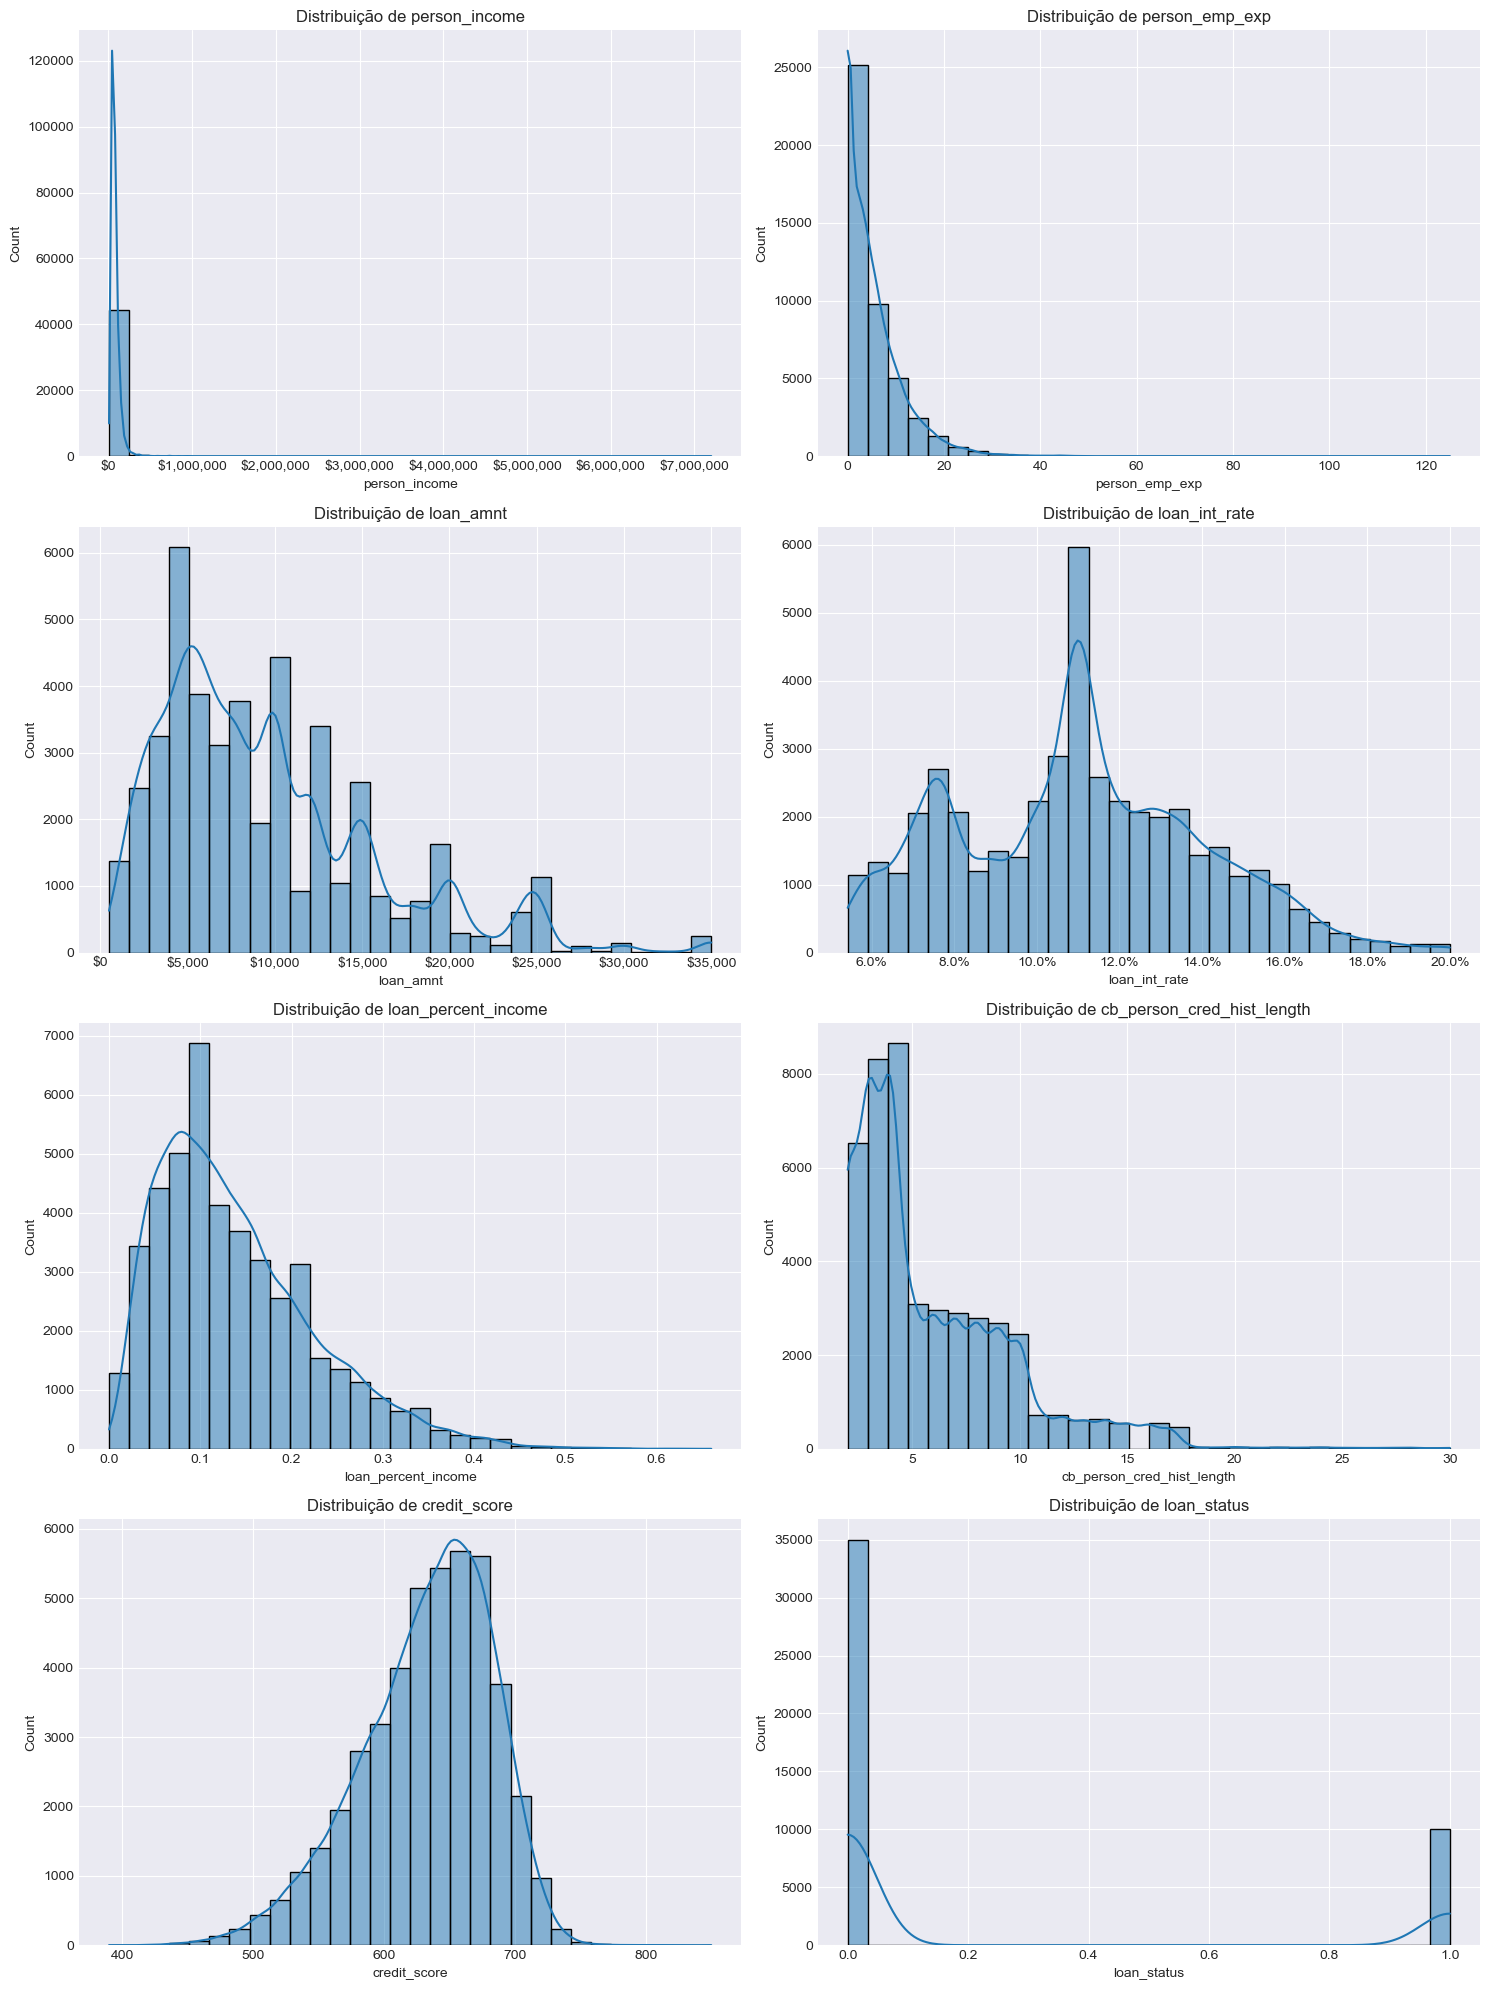


Estatísticas básicas das variáveis numéricas:
       person_income  person_emp_exp  loan_amnt  loan_int_rate  \
count       45000.00        45000.00   45000.00       45000.00   
mean        80319.05            5.41    9583.16          11.01   
std         80422.50            6.06    6314.89           2.98   
min          8000.00            0.00     500.00           5.42   
25%         47204.00            1.00    5000.00           8.59   
50%         67048.00            4.00    8000.00          11.01   
75%         95789.25            8.00   12237.25          12.99   
max       7200766.00          125.00   35000.00          20.00   

       loan_percent_income  cb_person_cred_hist_length  credit_score  \
count             45000.00                    45000.00      45000.00   
mean                  0.14                        5.87        632.61   
std                   0.09                        3.88         50.44   
min                   0.00                        2.00        390.00  

In [212]:
# Selecionando as colunas numéricas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Criando subplots para cada coluna numérica
n_cols = len(numeric_cols)
n_rows = (n_cols + 1) // 2  # Arredonda para cima
fig, axes = plt.subplots(n_rows, 2, figsize=(15, 5*n_rows))

# Achatando o array de axes para facilitar a iteração
axes = axes.ravel()

# Criando histogramas
for idx, col in enumerate(numeric_cols):
    sns.histplot(data=df, x=col, ax=axes[idx], bins=30, kde=True)
    axes[idx].set_title(f'Distribuição de {col}')
    
    # Formatando eixos para valores monetários
    if col in ['person_income', 'loan_amnt']:
        axes[idx].set_xticklabels([f'${x:,.0f}' for x in axes[idx].get_xticks()])
    
    # Formatando eixos para percentuais
    if col == 'loan_int_rate':
        axes[idx].set_xticklabels([f'{x:.1f}%' for x in axes[idx].get_xticks()])

# Removendo subplots vazios extras
for idx in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[idx])

# Ajustando o layout
plt.tight_layout()
plt.show()

# Mostrando estatísticas básicas
print("\nEstatísticas básicas das variáveis numéricas:")
print(df[numeric_cols].describe().round(2))

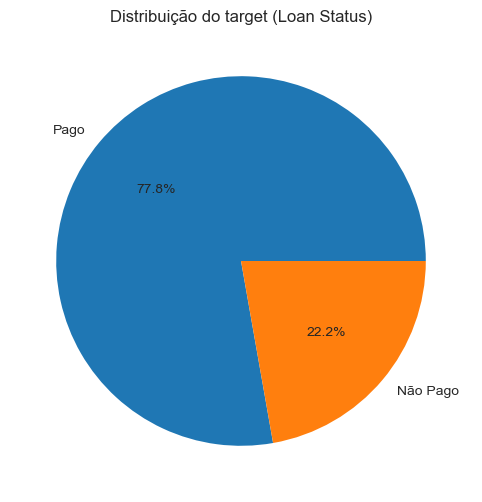

In [213]:
# Criando um gráfico de pizza para mostrar a distribuição da variável alvo (loan_status)
plt.figure(figsize=(10, 6))
loan_status_counts = df['loan_status'].value_counts()
plt.pie(loan_status_counts, labels=['Pago', 'Não Pago'], autopct='%1.1f%%')
plt.title('Distribuição do target (Loan Status)')

plt.show()

## Outliers


Relatório de Outliers:
--------------------------------------------------------------------------------

Coluna: person_income
Total de outliers: 2218
Percentual de outliers: 4.93%
Limite inferior: -25673.88
Limite superior: 168667.12


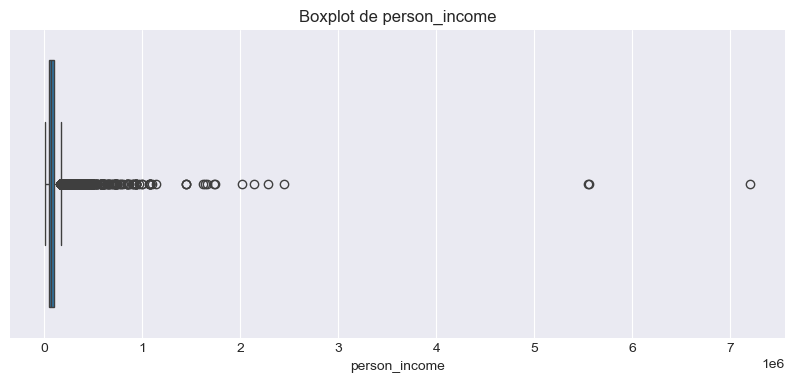


Coluna: person_emp_exp
Total de outliers: 1724
Percentual de outliers: 3.83%
Limite inferior: -9.50
Limite superior: 18.50


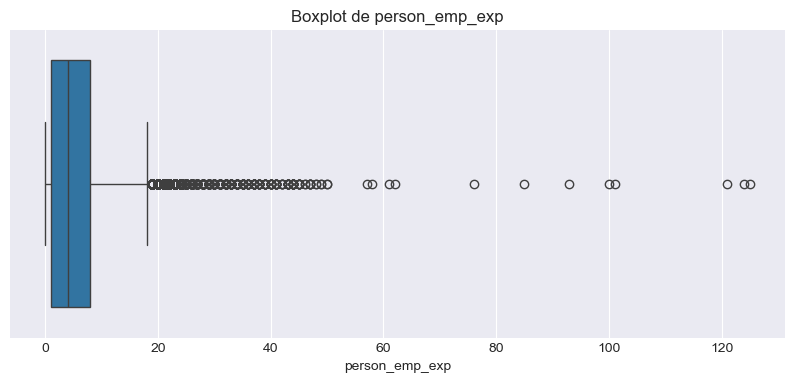


Coluna: loan_amnt
Total de outliers: 2348
Percentual de outliers: 5.22%
Limite inferior: -5855.88
Limite superior: 23093.12


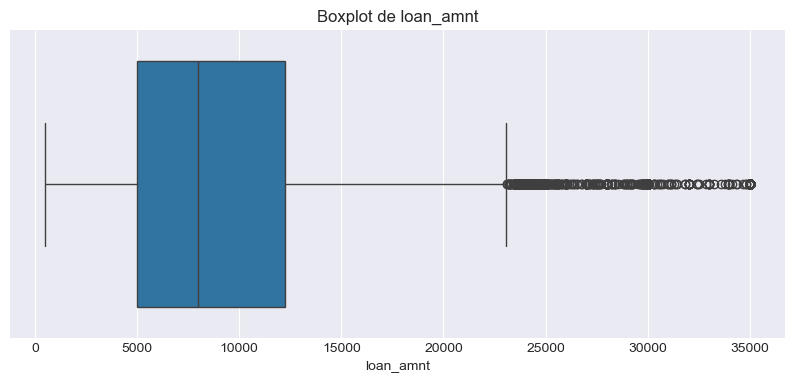


Coluna: loan_int_rate
Total de outliers: 124
Percentual de outliers: 0.28%
Limite inferior: 1.99
Limite superior: 19.59


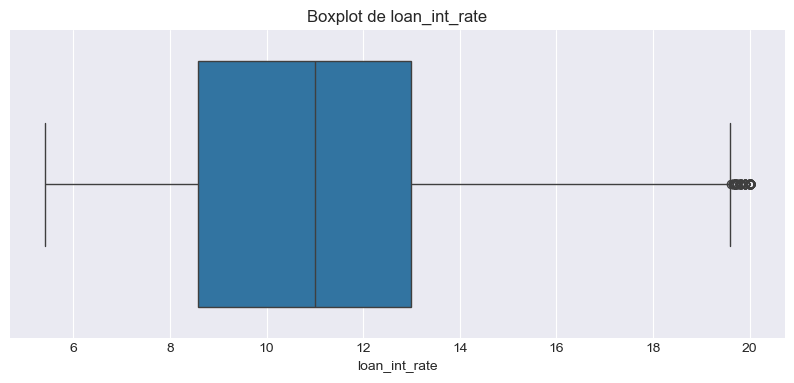


Coluna: loan_percent_income
Total de outliers: 744
Percentual de outliers: 1.65%
Limite inferior: -0.11
Limite superior: 0.37


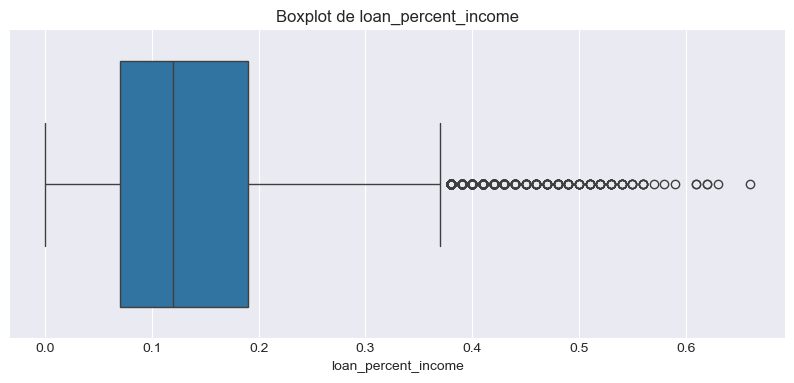


Coluna: cb_person_cred_hist_length
Total de outliers: 1366
Percentual de outliers: 3.04%
Limite inferior: -4.50
Limite superior: 15.50


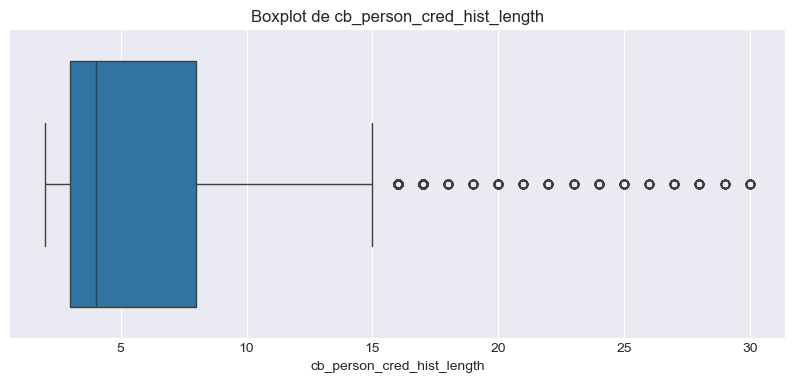


Coluna: credit_score
Total de outliers: 467
Percentual de outliers: 1.04%
Limite inferior: 497.50
Limite superior: 773.50


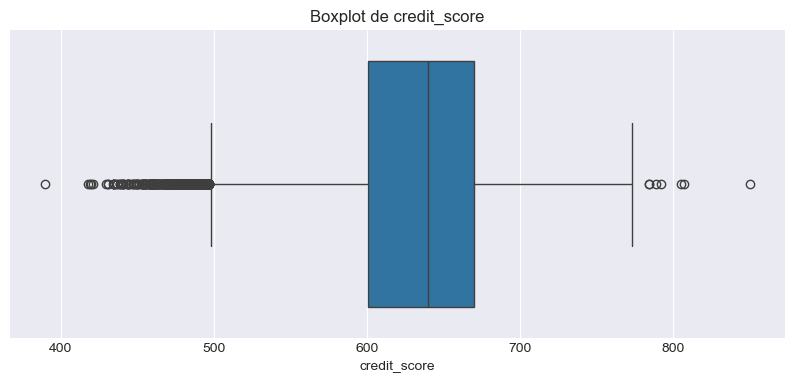


Coluna: loan_status
Total de outliers: 10000
Percentual de outliers: 22.22%
Limite inferior: 0.00
Limite superior: 0.00


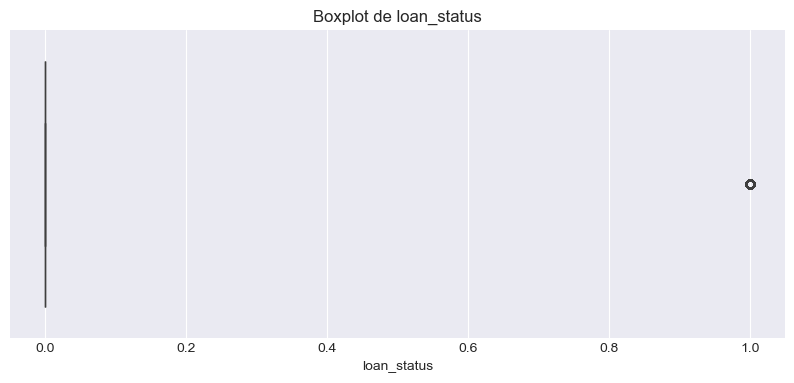

In [214]:
# Detectando outliers usando o método IQR (Interquartile Range)
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return {
        'coluna': column,
        'total_outliers': len(outliers),
        'percentual_outliers': (len(outliers) / len(df)) * 100,
        'limite_inferior': lower_bound,
        'limite_superior': upper_bound
    }

# Analisando outliers nas colunas numéricas
outliers_report = []

print("\nRelatório de Outliers:")
print("-" * 80)

for col in numeric_cols:
    result = detect_outliers(df, col)
    print(f"\nColuna: {result['coluna']}")
    print(f"Total de outliers: {result['total_outliers']}")
    print(f"Percentual de outliers: {result['percentual_outliers']:.2f}%")
    print(f"Limite inferior: {result['limite_inferior']:.2f}")
    print(f"Limite superior: {result['limite_superior']:.2f}")
    
    # Criando boxplot para visualização
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()


# Featuring


In [215]:
colunas_assimetricas = ['person_age', 'person_income', 'loan_amnt', 'credit_score', 'person_emp_exp', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']
colunas_simetricas = ['loan_int_rate']


In [216]:
# Criando os scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Aplicando StandardScaler nas colunas assimétricas
df[colunas_assimetricas] = standard_scaler.fit_transform(df[colunas_assimetricas])

# Aplicando MinMaxScaler nas colunas simétricas 
df[colunas_simetricas] = minmax_scaler.fit_transform(df[colunas_simetricas])



In [217]:
categorical_cols = ['person_gender', 'person_education', 'person_home_ownership', 
                   'loan_intent', 'previous_loan_defaults_on_file']

# 1. Label Encoding para variáveis binárias e ordinais
le = LabelEncoder()

# Encoding para variáveis binárias (2 categorias)
df['person_gender'] = le.fit_transform(df['person_gender'])
df['previous_loan_defaults_on_file'] = le.fit_transform(df['previous_loan_defaults_on_file'])


In [218]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

## Outlier Trimmering

In [219]:

# Selecionando colunas numéricas
numeric_cols = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

# Criando o OutlierTrimmer
trimmer = OutlierTrimmer(
    capping_method='iqr',  # usando método IQR (Intervalo Interquartil)
    tail='both',          # remove outliers de ambos os lados
    fold=1.5,            # multiplicador padrão do IQR
    variables=numeric_cols
)

# Aplicando o trimmer
df_clean = trimmer.fit_transform(df)

# Mostrando quantidade de registros antes e depois
print(f"Registros antes: {len(df)}")
print(f"Registros depois: {len(df_clean)}")
print(f"Registros removidos: {len(df) - len(df_clean)}")

df = df_clean


Registros antes: 45000
Registros depois: 37332
Registros removidos: 7668


## Feature Analysis

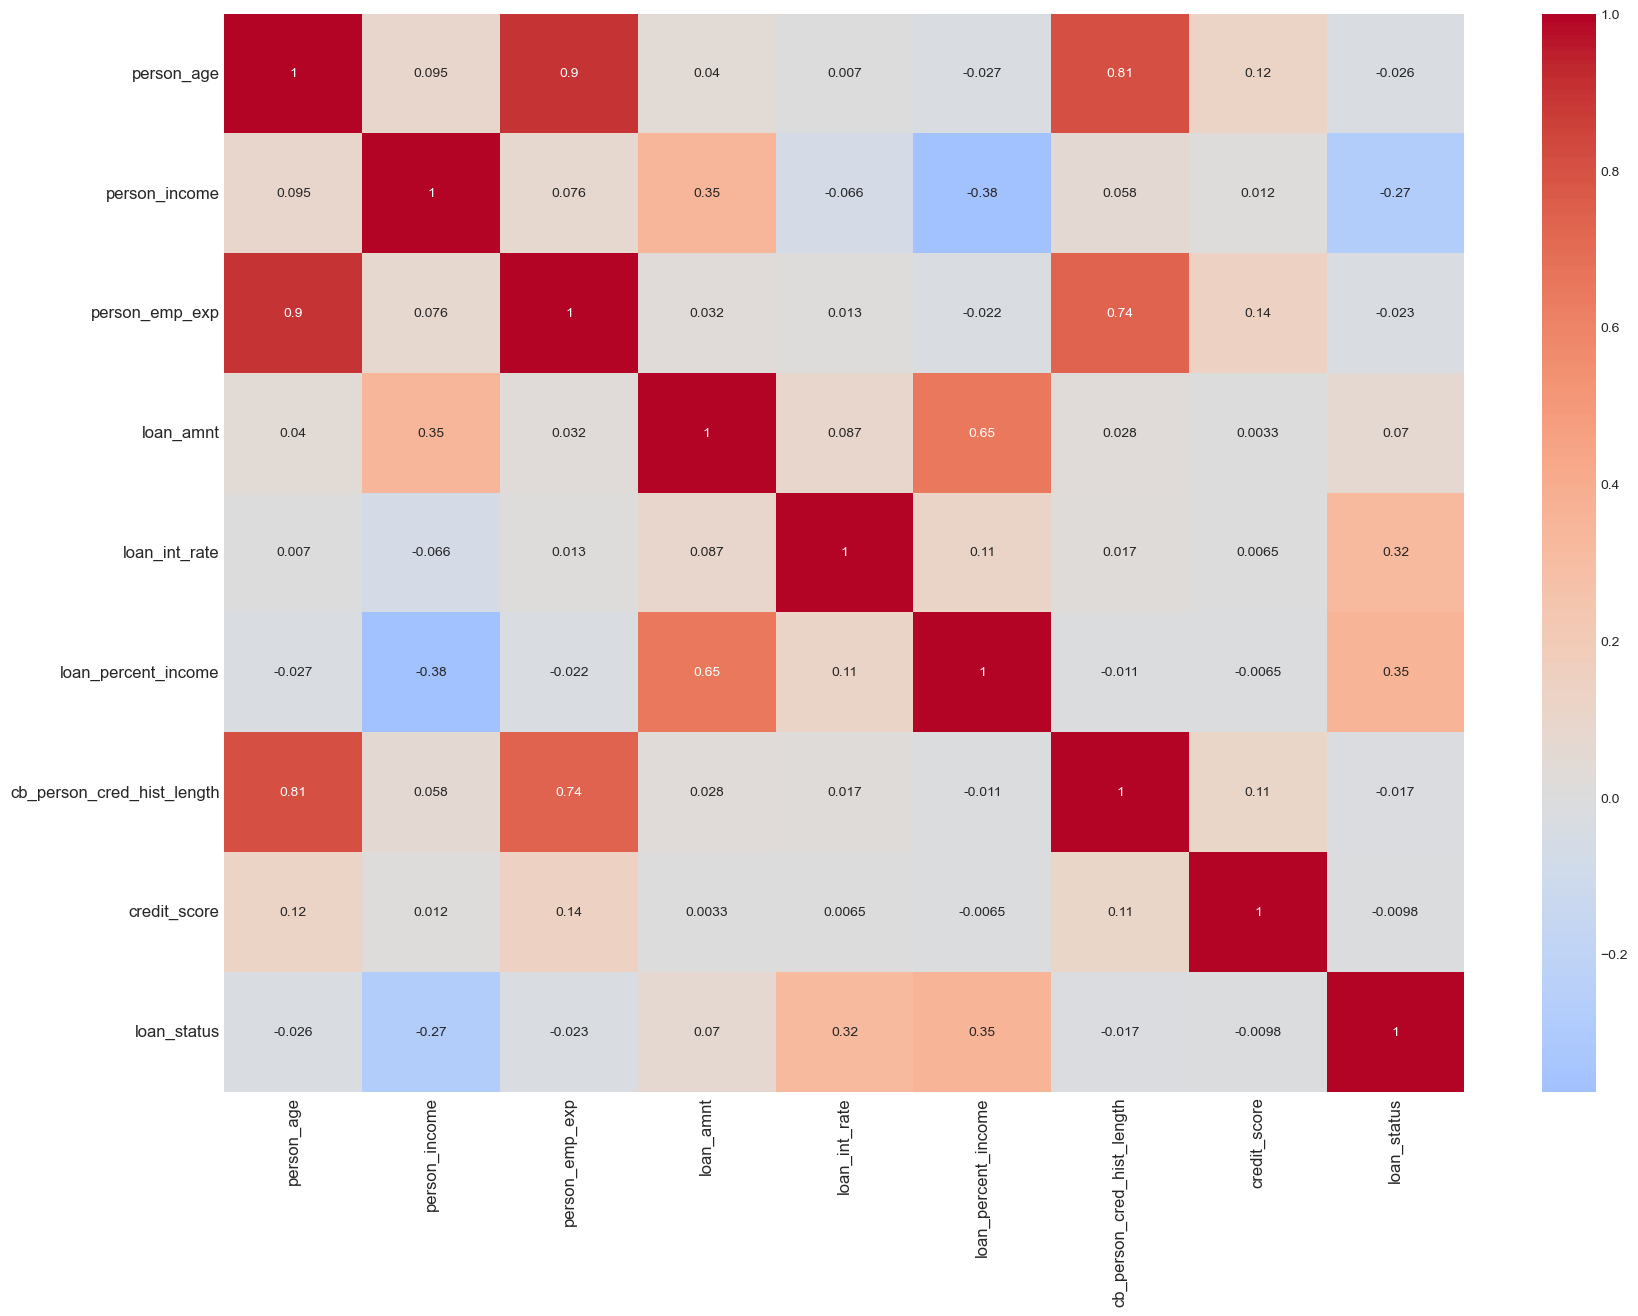

In [220]:
# Criando a matriz de correlação
plt.figure(figsize=(20, 14))
sns.heatmap(df[numeric_cols + ['loan_status']].corr(),
            annot=True,
            cmap='coolwarm',
            center=0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<Figure size 1200x600 with 0 Axes>

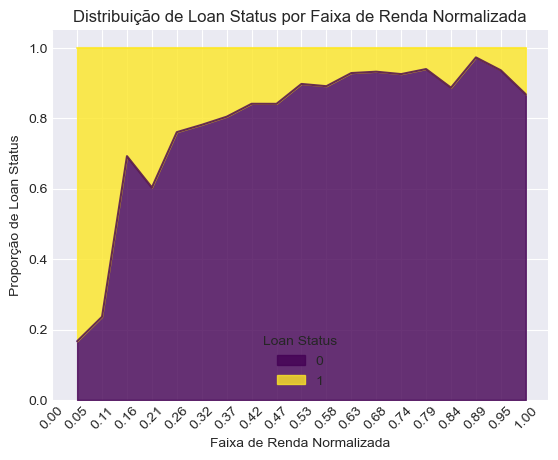

In [221]:
scaler = MinMaxScaler()
df['normalized_income'] = scaler.fit_transform(df[['person_income']])

# Criando bins para a renda normalizada
bins = np.linspace(0, 1, 20)  # 20 bins de 0 a 1
df['income_bin'] = np.digitize(df['normalized_income'], bins)

# Contando o número de cada loan_status em cada bin de renda
income_loan_status = df.groupby(['income_bin', 'loan_status']).size().unstack(fill_value=0)

# Calculando a proporção de cada loan_status em cada bin
income_loan_status = income_loan_status.div(income_loan_status.sum(axis=1), axis=0)

# Criando o gráfico de área empilhada
plt.figure(figsize=(12, 6))
income_loan_status.plot(kind='area', stacked=True, colormap='viridis', alpha=0.8)

# Adicionando título e rótulos
plt.title('Distribuição de Loan Status por Faixa de Renda Normalizada')
plt.xlabel('Faixa de Renda Normalizada')
plt.ylabel('Proporção de Loan Status')

# Ajustando os rótulos do eixo x para mostrar os limites dos bins
plt.xticks(ticks=np.arange(len(bins)), labels=[f'{b:.2f}' for b in bins], rotation=45)

# Exibindo o gráfico
plt.legend(title='Loan Status')
plt.show()

In [222]:

# 1. Identificando colunas com Label Encoding
label_encoded_cols = ['person_gender', 'previous_loan_defaults_on_file']

# 2. Preparando os dados
X_label = df[label_encoded_cols]
y = df['loan_status']

# 3. Calculando Mutual Information Score
mi_scores = mutual_info_classif(X_label, y)

# 4. Calculando F-scores
f_scores, _ = f_classif(X_label, y)

# 5. Mostrando resultados
print("Análise das Features com Label Encoding:\n")
print("Mutual Information Scores:")
for col, score in zip(label_encoded_cols, mi_scores):
    print(f"{col}: {score:.4f}")

print("\nF-scores:")
for col, score in zip(label_encoded_cols, f_scores):
    print(f"{col}: {score:.4f}")

# 6. Correlação com a variável target
correlations = df[label_encoded_cols + ['loan_status']].corr()['loan_status'].drop('loan_status')
print("\nCorrelação com loan_status:")
print(correlations)

Análise das Features com Label Encoding:

Mutual Information Scores:
person_gender: 0.0024
previous_loan_defaults_on_file: 0.1908

F-scores:
person_gender: 0.0039
previous_loan_defaults_on_file: 15129.9531

Correlação com loan_status:
person_gender                    -0.000412
previous_loan_defaults_on_file   -0.537038
Name: loan_status, dtype: float64


In [223]:
columns_to_encode = ['person_education', 'person_home_ownership', 'loan_intent']
# Análise de relação entre variáveis categóricas e target
for col in columns_to_encode:
    print(f"\nAnálise da Feature: {col}")
    print("-" * 50)
    
    # 1. Tabela de contingência
    cont_table = pd.crosstab(df[col], df['loan_status'])
    # 3. Chi-square test
    chi2_stat, p_value = chi2_contingency(cont_table)[:2]
    print(f"\nChi-square estatística: {chi2_stat:.4f}")
    print(f"p-value: {p_value:.4f}")
    
    # 4. Cramer's V
    n = cont_table.sum().sum()
    min_dim = min(cont_table.shape) - 1
    cramer_v = np.sqrt(chi2_stat / (n * min_dim))
    print(f"Cramer's V: {cramer_v:.4f}")
    
    print("\n" + "="*50)


Análise da Feature: person_education
--------------------------------------------------

Chi-square estatística: 2.7106
p-value: 0.6074
Cramer's V: 0.0085


Análise da Feature: person_home_ownership
--------------------------------------------------

Chi-square estatística: 2171.6237
p-value: 0.0000
Cramer's V: 0.2412


Análise da Feature: loan_intent
--------------------------------------------------

Chi-square estatística: 745.7759
p-value: 0.0000
Cramer's V: 0.1413



In [224]:
# Selecionando apenas as colunas relevantes
selected_columns = ['person_income', 'person_home_ownership', 'loan_int_rate', 
                   'loan_percent_income', 'previous_loan_defaults_on_file','loan_status']

# Dropando as demais colunas
df = df[selected_columns]


In [225]:
# One-hot encoding for person_home_ownership
df = pd.get_dummies(df, columns=['person_home_ownership'], prefix='home',dtype=int)


In [226]:
df.head()

,person_income,loan_int_rate,loan_percent_income,previous_loan_defaults_on_file,loan_status,home_MORTGAGE,home_OTHER,home_OWN,home_RENT
1,-0.846005,0.392318,-0.684829,1,0,0,0,1,0
5,-0.837686,0.117970,0.576474,0,1,0,0,1,0
9,-0.840322,0.639232,-0.111509,0,1,0,0,1,0
11,-0.835672,0.220165,2.296434,0,1,0,0,1,0
19,-0.821123,0.382030,-0.226173,0,1,1,0,0,0


# Training

In [227]:

# Separando features e target
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Dividindo em treino e teste (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,           # 20% para teste
    random_state=42,         # para reprodutibilidade
    stratify=y               # mantém proporção das classes
)

# Mostrando as dimensões dos conjuntos
print("Dimensões dos conjuntos:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

# Verificando a distribuição das classes
print("\nDistribuição das classes:")
print("Treino:")
print(y_train.value_counts(normalize=True))
print("\nTeste:")
print(y_test.value_counts(normalize=True))

Dimensões dos conjuntos:
X_train: (29865, 8)
X_test: (7467, 8)
y_train: (29865,)
y_test: (7467,)

Distribuição das classes:
Treino:
loan_status
0    0.787276
1    0.212724
Name: proportion, dtype: float64

Teste:
loan_status
0    0.787331
1    0.212669
Name: proportion, dtype: float64


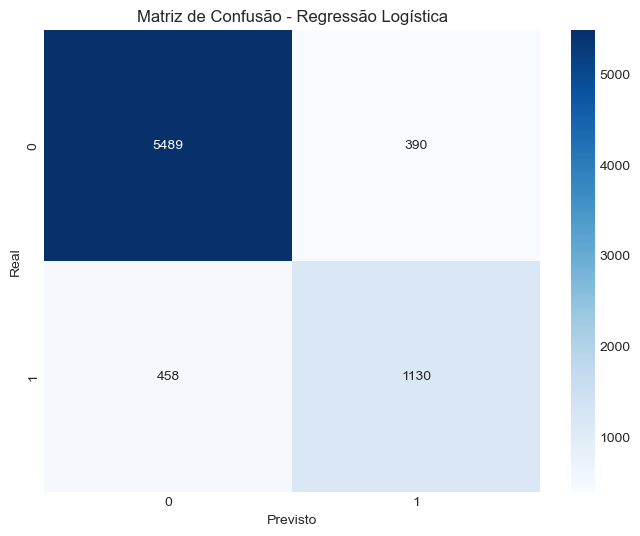


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      5879
           1       0.74      0.71      0.73      1588

    accuracy                           0.89      7467
   macro avg       0.83      0.82      0.83      7467
weighted avg       0.88      0.89      0.89      7467


Acurácia do modelo: 0.8864


In [228]:
# 1. Treinando Regressão Logística
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# 2. Fazendo previsões
y_pred = lr.predict(X_test)

# 3. Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)

# 4. Plotando a Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Regressão Logística')
plt.ylabel('Real')
plt.xlabel('Previsto')
plt.show()

# 5. Métricas de avaliação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# 6. Acurácia do modelo
print(f"\nAcurácia do modelo: {lr.score(X_test, y_test):.4f}")

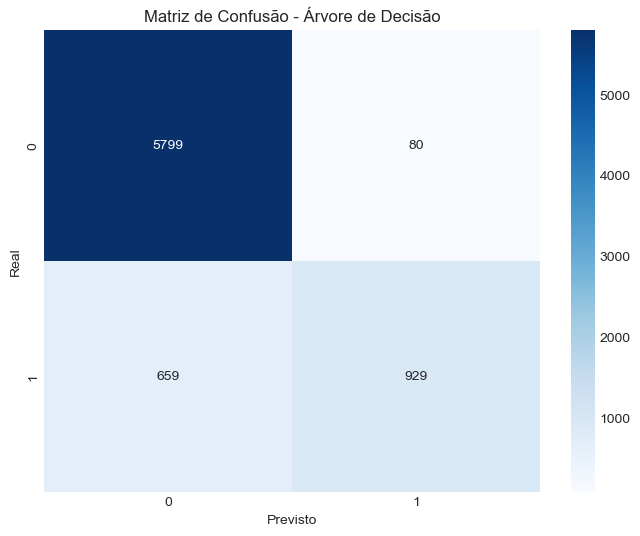


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      5879
           1       0.92      0.59      0.72      1588

    accuracy                           0.90      7467
   macro avg       0.91      0.79      0.83      7467
weighted avg       0.90      0.90      0.89      7467



In [229]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

# 1. Criando o modelo com os melhores parâmetros encontrados
dt = DecisionTreeClassifier(
    class_weight={0: 1, 1: 0.5},
    criterion='gini', 
    max_depth=4,
    min_samples_leaf=30,
    min_samples_split=50,
    random_state=42
)

# 2. Treinando o modelo
dt.fit(X_train, y_train)

# 3. Fazendo previsões
y_pred = dt.predict(X_test)

# 4. Avaliando o modelo
# Calculando métricas específicas
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fpr = fp / (fp + tn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)


# Matriz de Confusão
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.ylabel('Real')
plt.xlabel('Previsto')
plt.show()

# Relatório completo
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


Treinando modelo XGBoost...

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      5879
           1       0.95      0.53      0.68      1588

    accuracy                           0.89      7467
   macro avg       0.92      0.76      0.81      7467
weighted avg       0.90      0.89      0.88      7467



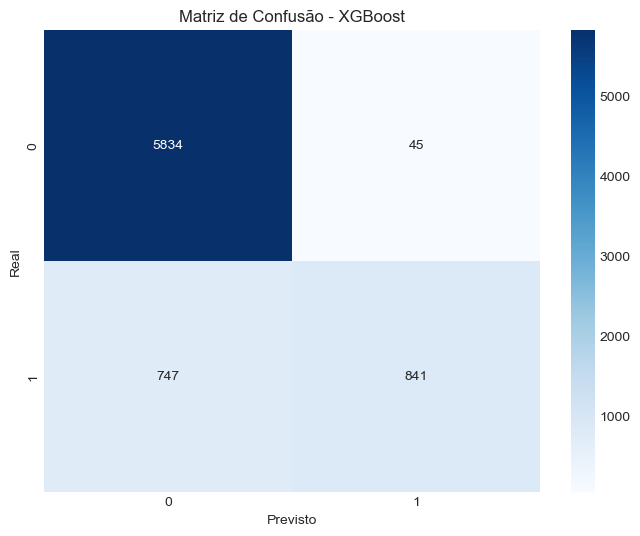

In [241]:
# Criando modelo XGBoost com os melhores parâmetros encontrados por meio de GridSearch
xgb_model = XGBClassifier(
    random_state=42,
    n_estimators=200,
    reg_lambda=1,
    reg_alpha=0.1,
    colsample_bytree=0.7,
    gamma=0.5, 
    learning_rate=0.01,
    max_depth=3,
    min_child_weight=9,
    scale_pos_weight=0.6,
    subsample=0.8
)

# Treinando o modelo
print("Treinando modelo XGBoost...")
xgb_model.fit(X_train, y_train)

# Fazendo predições
y_pred = xgb_model.predict(X_test)

# Calculando métricas
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fpr = fp / (fp + tn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)

# Relatório completo
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Matriz de Confusão
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - XGBoost')
plt.ylabel('Real')
plt.xlabel('Previsto')
plt.show()

# Validation



Decision Tree - Resultados da Validação Cruzada:
--------------------------------------------------

F1:
Treino: 0.7195 (+/- 0.0098)
Teste:  0.7183 (+/- 0.0173)
Gap:    0.0012

PRECISION:
Treino: 0.9148 (+/- 0.0128)
Teste:  0.9115 (+/- 0.0319)
Gap:    0.0033

RECALL:
Treino: 0.5930 (+/- 0.0188)
Teste:  0.5927 (+/- 0.0114)
Gap:    0.0003

ACCURACY:
Treino: 0.9017 (+/- 0.0019)
Teste:  0.9011 (+/- 0.0071)
Gap:    0.0006

XGBoost - Resultados da Validação Cruzada:
--------------------------------------------------

F1:
Treino: 0.6776 (+/- 0.0193)
Teste:  0.6766 (+/- 0.0274)
Gap:    0.0010

PRECISION:
Treino: 0.9478 (+/- 0.0080)
Teste:  0.9452 (+/- 0.0112)
Gap:    0.0025

RECALL:
Treino: 0.5274 (+/- 0.0251)
Teste:  0.5271 (+/- 0.0336)
Gap:    0.0004

ACCURACY:
Treino: 0.8933 (+/- 0.0039)
Teste:  0.8929 (+/- 0.0078)
Gap:    0.0004


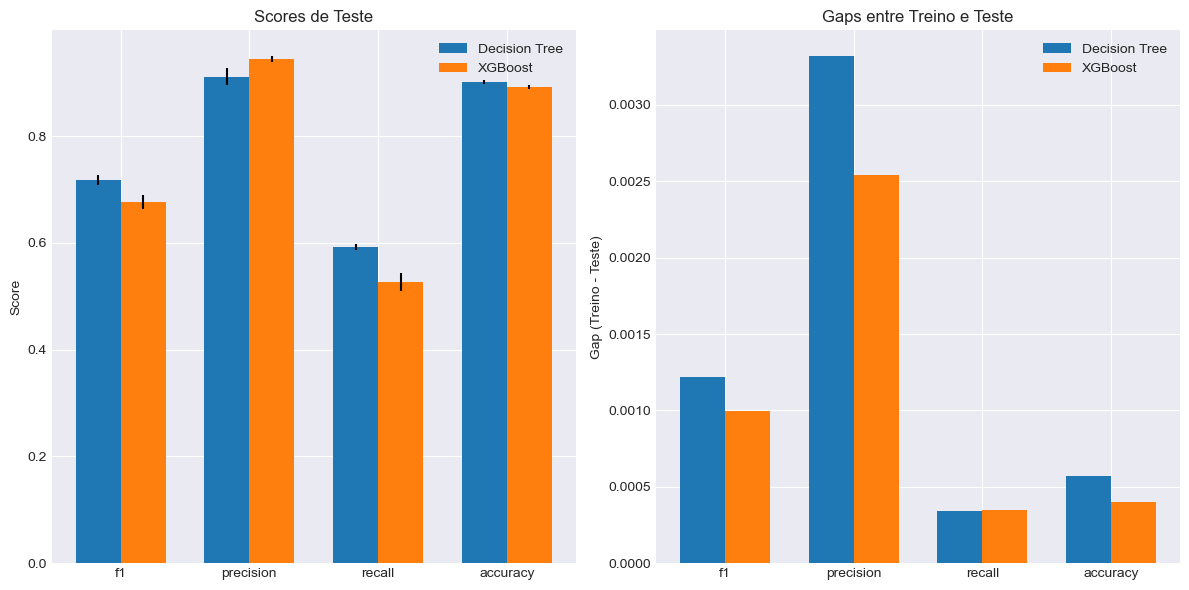

In [246]:
from sklearn.model_selection import KFold, cross_val_score, cross_validate


# Configurando o KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Métricas que queremos avaliar
scoring = {
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall',
    'accuracy': 'accuracy'
}

# 1. Avaliando Decision Tree
dt_scores = cross_validate(
    dt, 
    X_train, 
    y_train,
    cv=kfold,
    scoring=scoring,
    return_train_score=True,
    n_jobs=-1
)

# 2. Avaliando XGBoost
xgb_scores = cross_validate(
    xgb_model, 
    X_train, 
    y_train,
    cv=kfold,
    scoring=scoring,
    return_train_score=True,
    n_jobs=-1
)

# Função para formatar resultados
def print_scores(scores, model_name):
    print(f"\n{model_name} - Resultados da Validação Cruzada:")
    print("-" * 50)
    
    for metric in scoring.keys():
        train_metric = f"train_{metric}"
        test_metric = f"test_{metric}"
        
        train_mean = scores[train_metric].mean()
        train_std = scores[train_metric].std()
        test_mean = scores[test_metric].mean()
        test_std = scores[test_metric].std()
        
        print(f"\n{metric.upper()}:")
        print(f"Treino: {train_mean:.4f} (+/- {train_std*2:.4f})")
        print(f"Teste:  {test_mean:.4f} (+/- {test_std*2:.4f})")
        print(f"Gap:    {train_mean - test_mean:.4f}")

# Imprimindo resultados
print_scores(dt_scores, "Decision Tree")
print_scores(xgb_scores, "XGBoost")

# Visualização dos resultados
plt.figure(figsize=(12, 6))

# Preparando dados para visualização
metrics = list(scoring.keys())
x = np.arange(len(metrics))
width = 0.35

# Plot para scores de teste
plt.subplot(1, 2, 1)
dt_test_means = [dt_scores[f'test_{m}'].mean() for m in metrics]
dt_test_stds = [dt_scores[f'test_{m}'].std() for m in metrics]
xgb_test_means = [xgb_scores[f'test_{m}'].mean() for m in metrics]
xgb_test_stds = [xgb_scores[f'test_{m}'].std() for m in metrics]

plt.bar(x - width/2, dt_test_means, width, label='Decision Tree', yerr=dt_test_stds)
plt.bar(x + width/2, xgb_test_means, width, label='XGBoost', yerr=xgb_test_stds)
plt.ylabel('Score')
plt.title('Scores de Teste')
plt.xticks(x, metrics)
plt.legend()

# Plot para gaps (diferença treino-teste)
plt.subplot(1, 2, 2)
dt_gaps = [dt_scores[f'train_{m}'].mean() - dt_scores[f'test_{m}'].mean() for m in metrics]
xgb_gaps = [xgb_scores[f'train_{m}'].mean() - xgb_scores[f'test_{m}'].mean() for m in metrics]

plt.bar(x - width/2, dt_gaps, width, label='Decision Tree')
plt.bar(x + width/2, xgb_gaps, width, label='XGBoost')
plt.ylabel('Gap (Treino - Teste)')
plt.title('Gaps entre Treino e Teste')
plt.xticks(x, metrics)
plt.legend()

plt.tight_layout()
plt.show()